## Main takeaways
   - Heart rate and calories tend to correlate with different features across different sport types.
   - For user with long-term workout behavior, more training tends to lower the heart rate. 

In [2]:
import pandas as pd

In [6]:
cd ..

/Users/Chao


In [7]:
cd Downloads/

/Users/Chao/Downloads


In [8]:
df_full = pd.read_pickle('HR_proper_full_with_meta.pkl')

In [9]:
df_light = pd.read_pickle('HR_proper_light_with_meta.pkl')

In [10]:
df_light.head()

,id,userId,gender,sport,heart_rate_mean,heart_rate_std,duration_s,start_end,altitude_mean,altitude_std,...,distance_total_m,speed_mean,speed_std,hydration,ascent,descent,calories,distance,weather,start_time
0,396826535,10921915,male,bike,152.650,10.229736,7589.0,"[1408898746.0, 1408906335.0]",43.0712,13.475900,...,53048.413644,7.117435,2.182678,NaN,423.0,428.0,1562.0,53.88458,3.0,2014-08-24T09:45:46.000Z
1,392337038,10921915,male,bike,147.710,10.970046,4440.0,"[1408221682.0, 1408226122.0]",35.7248,10.376062,...,32466.566953,7.550103,2.272863,NaN,227.0,230.0,908.0,32.60639,6.0,2014-08-16T13:41:22.000Z
2,389643739,10921915,male,bike,140.554,11.319500,6749.0,"[1407858459.0, 1407865208.0]",62.4256,13.217515,...,45308.570377,7.154326,2.150951,NaN,336.0,360.0,1138.0,45.68974,3.0,2014-08-12T08:47:39.000Z
3,386729739,10921915,male,bike,147.020,11.414885,4519.0,"[1407432042.0, 1407436561.0]",32.6104,11.417463,...,32528.910062,7.416873,2.201268,NaN,245.0,241.0,921.0,32.70480,NaN,2014-08-07T10:20:42.000Z
4,383186560,10921915,male,bike (transport),167.154,10.414523,1357.0,"[1406909434.0, 1406910791.0]",22.7620,8.383674,...,11935.117059,8.721936,2.388718,NaN,90.0,108.0,350.0,11.92104,3.0,2014-08-01T09:10:34.000Z


In [11]:
import missingno as msno

<AxesSubplot:>

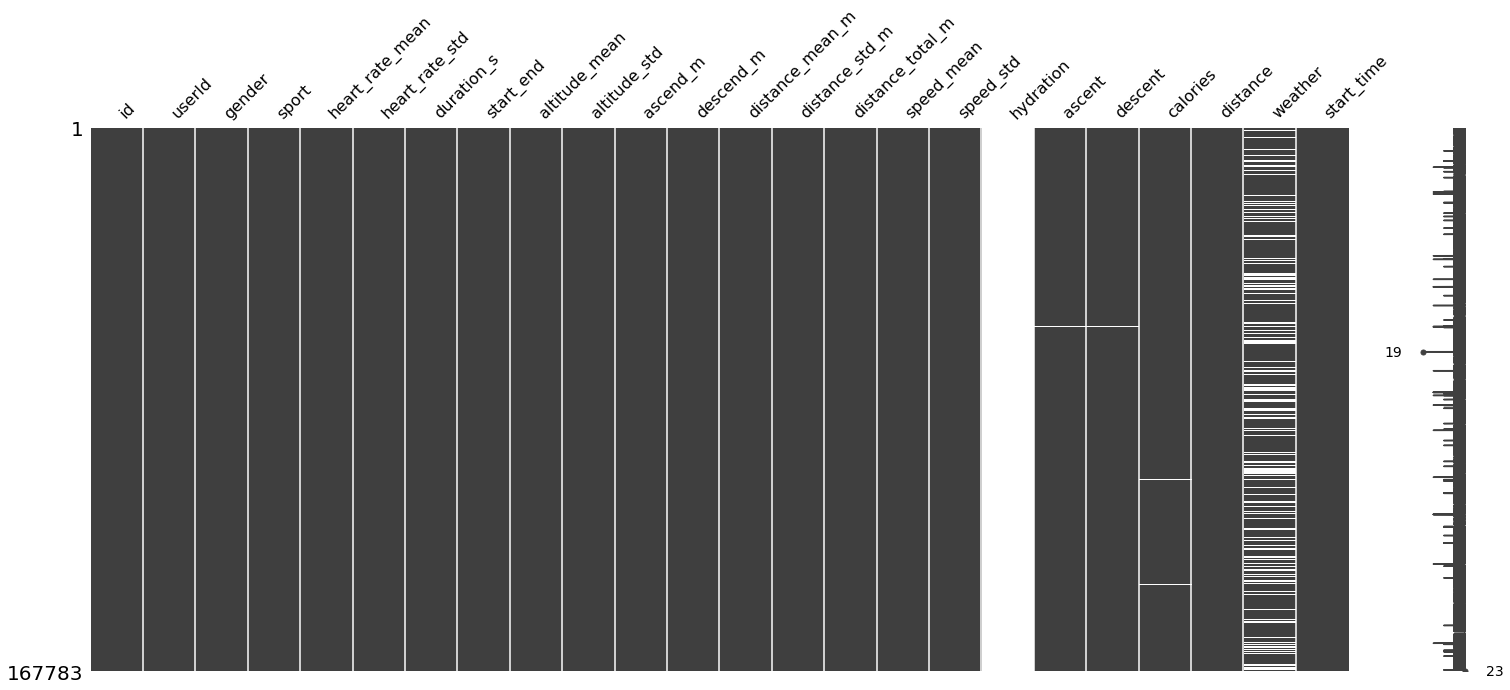

In [12]:
msno.matrix(df_light)

In [13]:
df_light.isnull().sum()

id                       0
userId                   0
gender                   0
sport                    0
heart_rate_mean          0
heart_rate_std           0
duration_s               0
start_end                0
altitude_mean            0
altitude_std             0
ascend_m                 0
descend_m                0
distance_mean_m          0
distance_std_m           0
distance_total_m         0
speed_mean               0
speed_std                0
hydration           167783
ascent                 161
descent                162
calories               498
distance               102
weather              37676
start_time               0
dtype: int64

### Dropping features not needed at this point
- Dropping hydration which has so many NAs and weather which is quite hard to decode from Yao-Wen's analysis
- start_end has been already used to calculate the duration
- start_time has been drop as duration has been extracted already
- ascent and descent dropped at this point as their derived features has been saved; come revisit these features as needed
- id has been used to join the derivative df and meta so it will be dropped

In [31]:
df_light_selected_1 = df_light.drop(['hydration', 'weather', 'start_end', 'start_time','ascent','descent','id', 'distance'], axis=1)

In [32]:
df_light_selected_1.head()

,userId,gender,sport,heart_rate_mean,heart_rate_std,duration_s,altitude_mean,altitude_std,ascend_m,descend_m,distance_mean_m,distance_std_m,distance_total_m,speed_mean,speed_std,calories
0,10921915,male,bike,152.650,10.229736,7589.0,43.0712,13.475900,407.6,413.0,106.309446,57.798961,53048.413644,7.117435,2.182678,1562.0
1,10921915,male,bike,147.710,10.970046,4440.0,35.7248,10.376062,225.4,228.8,65.063260,42.196571,32466.566953,7.550103,2.272863,908.0
2,10921915,male,bike,140.554,11.319500,6749.0,62.4256,13.217515,328.8,352.4,90.798738,50.482550,45308.570377,7.154326,2.150951,1138.0
3,10921915,male,bike,147.020,11.414885,4519.0,32.6104,11.417463,242.8,238.6,65.188197,41.980981,32528.910062,7.416873,2.201268,921.0
4,10921915,male,bike (transport),167.154,10.414523,1357.0,22.7620,8.383674,89.6,107.4,23.918070,23.000186,11935.117059,8.721936,2.388718,350.0


In [33]:
# There are 1059 users in the current dataframe
df_light_selected_1.userId.nunique()

1059

In [34]:
# There are 43 kinds of sports
df_light_selected_1.sport.nunique()

43

In [35]:
df_light_selected_1.sport.value_counts()

bike                       71915
run                        70591
mountain bike              10722
bike (transport)            7757
indoor cycling              1725
walk                        1289
orienteering                 867
cross-country skiing         789
core stability training      448
fitness walking              292
skate                        271
roller skiing                238
hiking                       237
kayaking                      92
circuit training              89
weight training               74
rowing                        71
gymnastics                    66
soccer                        51
downhill skiing               48
treadmill running             28
snowshoeing                   16
swimming                      14
golf                          12
elliptical                    10
horseback riding              10
badminton                     10
basketball                     8
tennis                         8
aerobics                       7
climbing  

In [36]:
# There are 3 genders with some as unknown
df_light_selected_1.gender.nunique()

3

<div class="alert alert-block alert-info">
Are we able to figure out the gender based on the records? A question to think about.
</div>

In [37]:
df_light_selected_1.gender.value_counts()

male       156717
female       9881
unknown      1185
Name: gender, dtype: int64

In [56]:
# Adding a calories burn per duration feature
df_light_selected_1['calorie_per_sec'] =  df_light_selected_1['calories'] / df_light_selected_1['duration_s']

### Looking deeper into trends from all bikers

In [57]:
df_bike = df_light_selected_1[df_light_selected_1['sport']=='bike']

In [58]:
df_bike

,userId,gender,sport,heart_rate_mean,heart_rate_std,duration_s,altitude_mean,altitude_std,ascend_m,descend_m,distance_mean_m,distance_std_m,distance_total_m,speed_mean,speed_std,calories,calorie_per_sec
0,10921915,male,bike,152.650,10.229736,7589.0,43.0712,13.475900,407.6,413.0,106.309446,57.798961,53048.413644,7.117435,2.182678,1562.0,0.205824
1,10921915,male,bike,147.710,10.970046,4440.0,35.7248,10.376062,225.4,228.8,65.063260,42.196571,32466.566953,7.550103,2.272863,908.0,0.204505
2,10921915,male,bike,140.554,11.319500,6749.0,62.4256,13.217515,328.8,352.4,90.798738,50.482550,45308.570377,7.154326,2.150951,1138.0,0.168618
3,10921915,male,bike,147.020,11.414885,4519.0,32.6104,11.417463,242.8,238.6,65.188197,41.980981,32528.910062,7.416873,2.201268,921.0,0.203806
8,10921915,male,bike,137.804,14.884139,13015.0,3.7616,7.431584,496.4,494.0,138.111543,67.010665,68917.660201,6.353138,1.963684,1742.0,0.133846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167756,69,male,bike,140.582,11.788778,5426.0,49.7648,14.289880,291.4,323.8,87.527512,52.373270,43676.228589,7.929269,2.532936,1129.0,0.208072
167757,69,male,bike,144.992,9.883923,5596.0,46.5416,14.990625,326.8,294.0,86.819364,47.860141,43322.862768,7.645806,2.027765,1196.0,0.213724
167758,69,male,bike,136.880,12.102297,7293.0,19.4878,17.152069,316.2,361.6,87.542455,53.509900,43683.685191,7.404002,2.380199,1215.0,0.166598
167779,69,male,bike,108.846,22.735221,3389.0,13.9304,2.401365,16.9,19.7,5.828178,4.111083,2908.260612,1.581994,1.098630,205.0,0.060490


In [59]:
import seaborn as sns

In [60]:
df_bike_nums = df_bike.drop(['gender', 'sport'], axis=1)

In [61]:
corr = df_bike.corr()

In [62]:
sns.set(rc={'figure.figsize':(20,12)})

<AxesSubplot:>

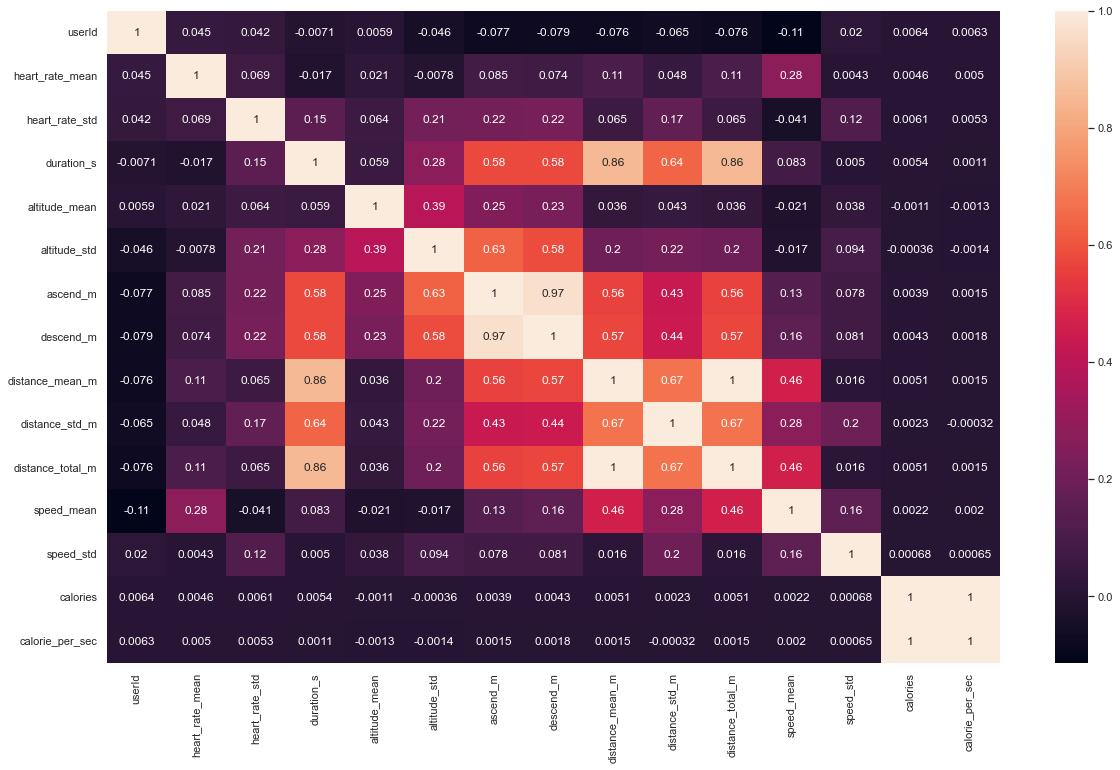

In [63]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

**From the correlation map of all biking, distance_total_m highly correlates (typically defined as above 0.6 correlation coefficient) with distance_std_m, distance_mean_m, and duration_s.**

**Calorie doesn't show high correlation with any other features but caloris_per_sec.**

## Analysis of the correlation between features in Top 6 sports

### Looking deeper into runners

In [64]:
sns.set(font_scale = 1.5)

<AxesSubplot:>

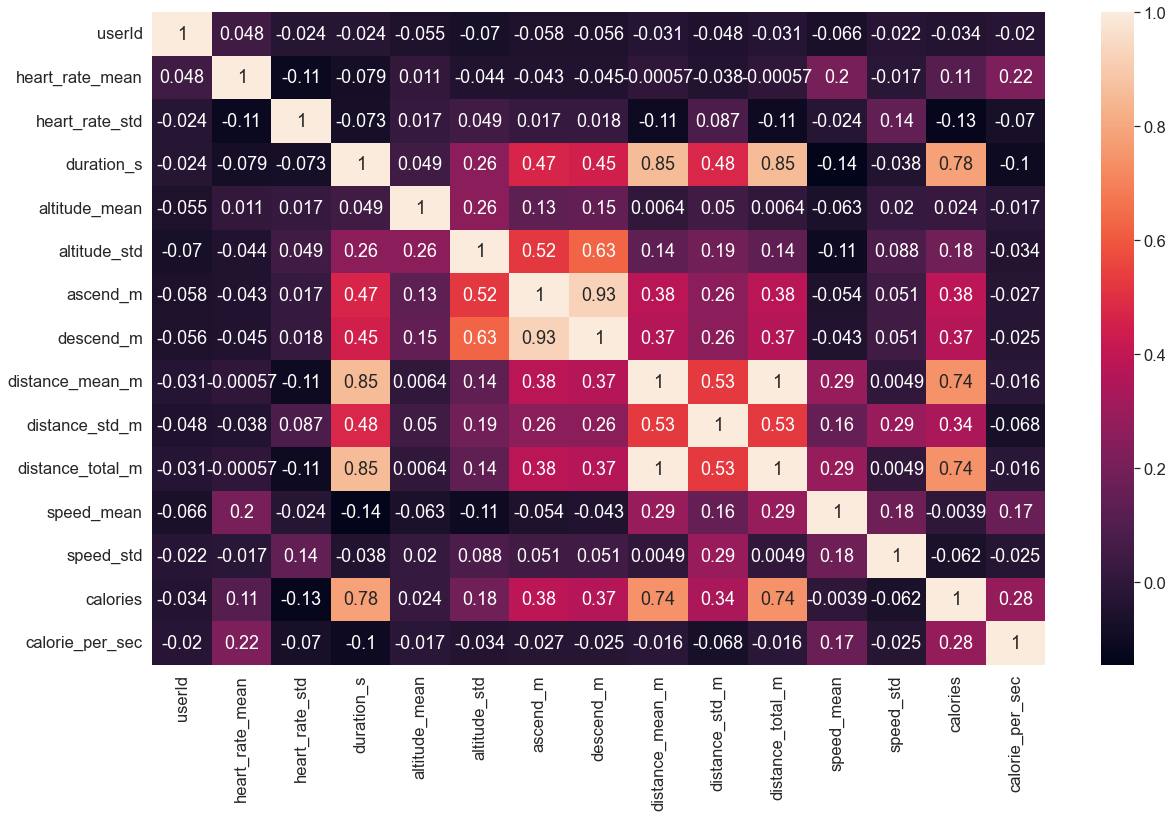

In [65]:
df_run = df_light_selected_1[df_light_selected_1['sport']=='run']
corr = df_run.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

**From the correlation map of all running, distance_total_m highly correlates (typically defined as above 0.6 correlation coefficient) with calories and durations_s.**

**The potential target calories is highly correlated with disance_total_m, distance_mean_m and duration_s.**

### Looking deeper into bikers

<AxesSubplot:>

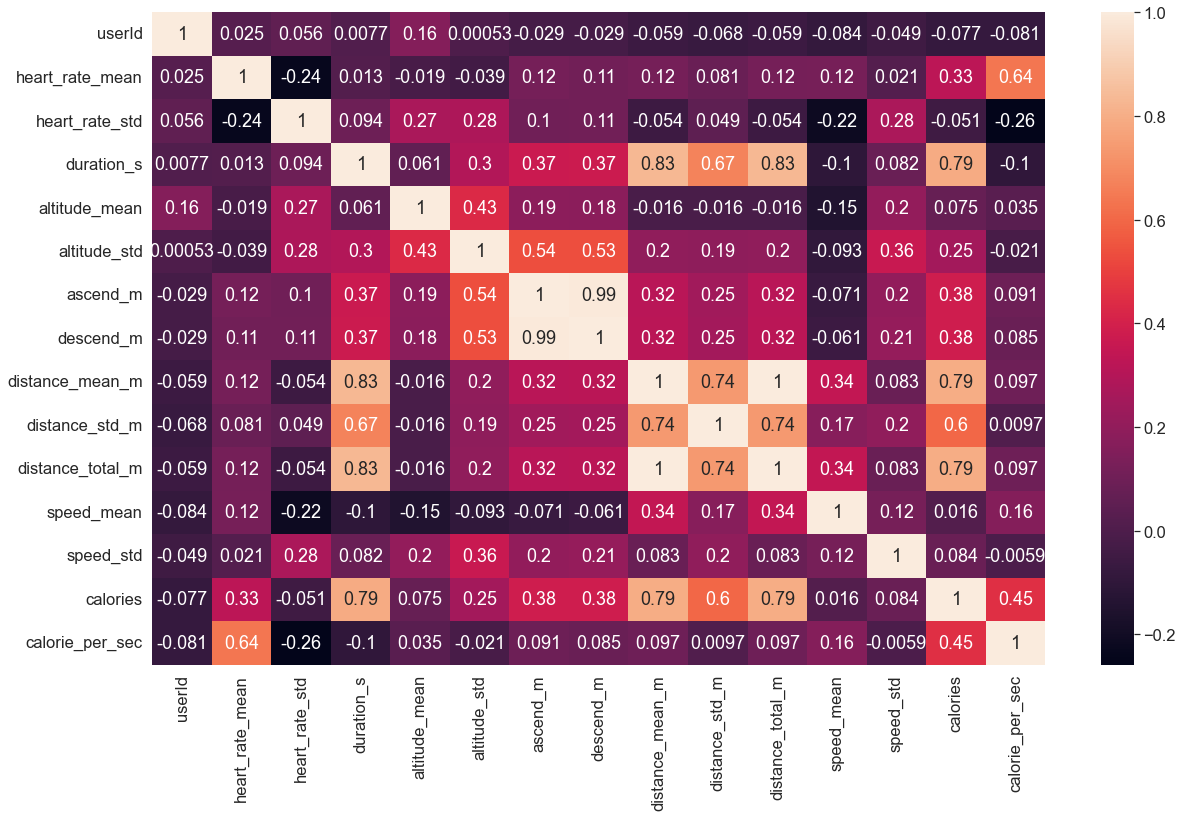

In [66]:
df_mountain_bike = df_light_selected_1[df_light_selected_1['sport']=='mountain bike']
corr = df_mountain_bike.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

**From the correlation map of all mountain biking, distance_total_m highly correlates (typically defined as above 0.6 correlation coefficient) with calories, distance_std_m and durations_s.**

**The potential target calories is highly correlated with disance_total_m, disance_std_m, distance_mean_m and duration_s.**

### Looking deeper into bikers (transport)

<AxesSubplot:>

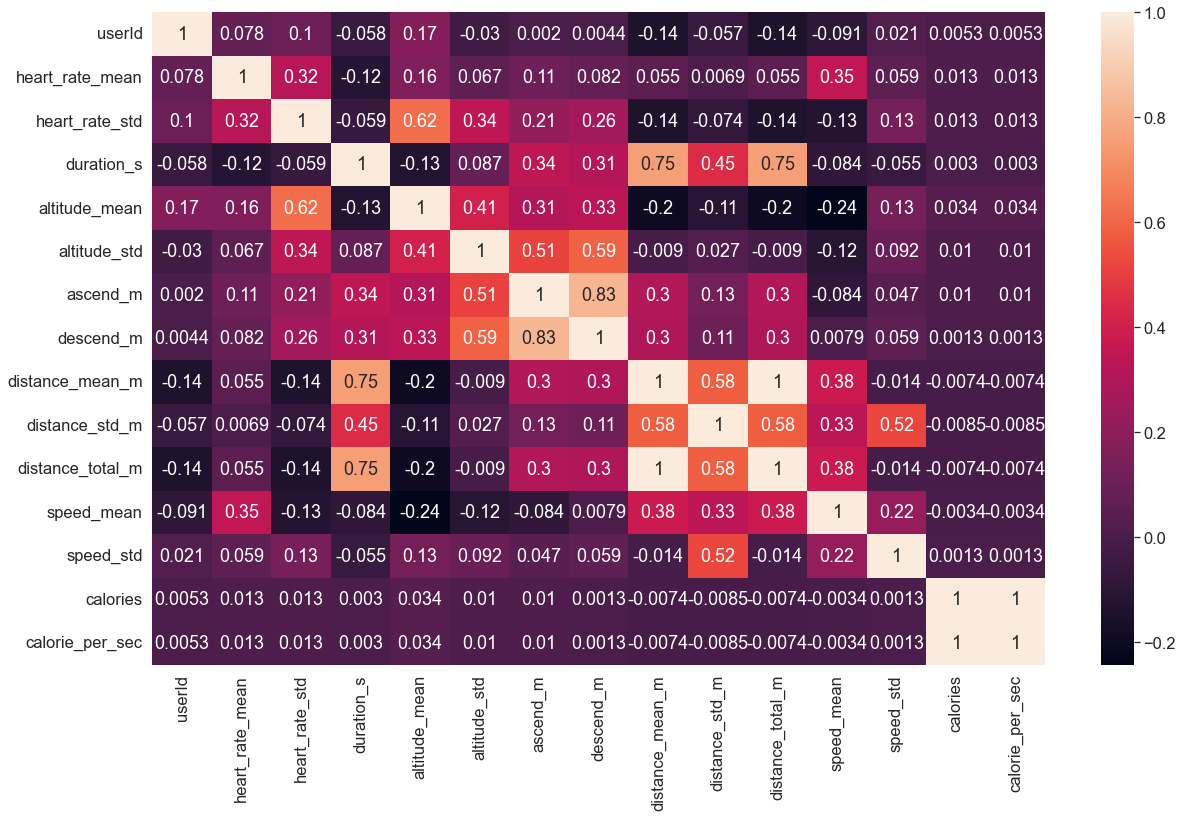

In [67]:
df_bike_transport = df_light_selected_1[df_light_selected_1['sport']=='bike (transport)']
corr = df_bike_transport.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

**From the correlation map of all biking (transport), distance_total_m highly correlates (typically defined as above 0.6 correlation coefficient) with durations_s.**

**The potential target calories is not highly correlated with any feature but caloris_per_sec.**

### Looking deeper into indoor cycling

<AxesSubplot:>

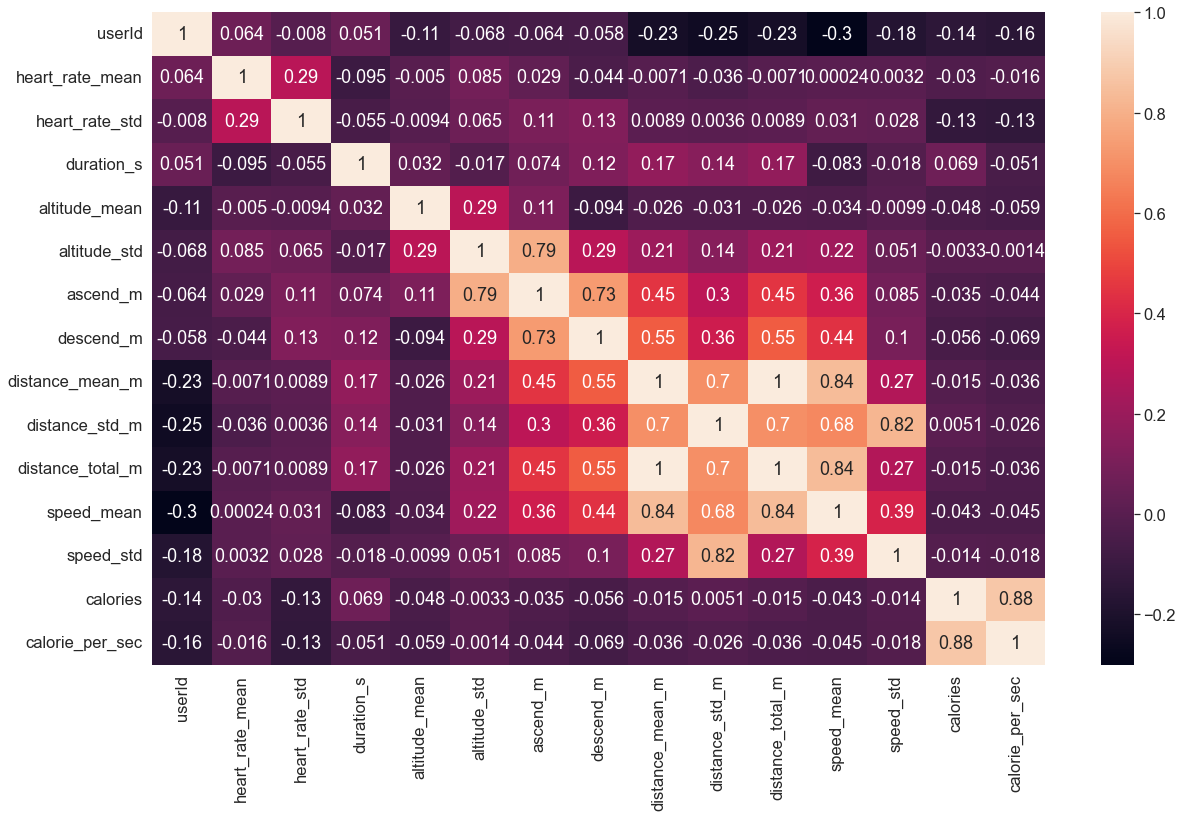

In [68]:
df_indoor_cycling = df_light_selected_1[df_light_selected_1['sport']=='indoor cycling']
corr = df_indoor_cycling.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

**From the correlation map of all indoor cycling, distance_total_m highly correlates with speed_mean, distance_std_m**

**The potential target calories is not highly correlated with any features but calories.**

### Looking deeper into walkers

<AxesSubplot:>

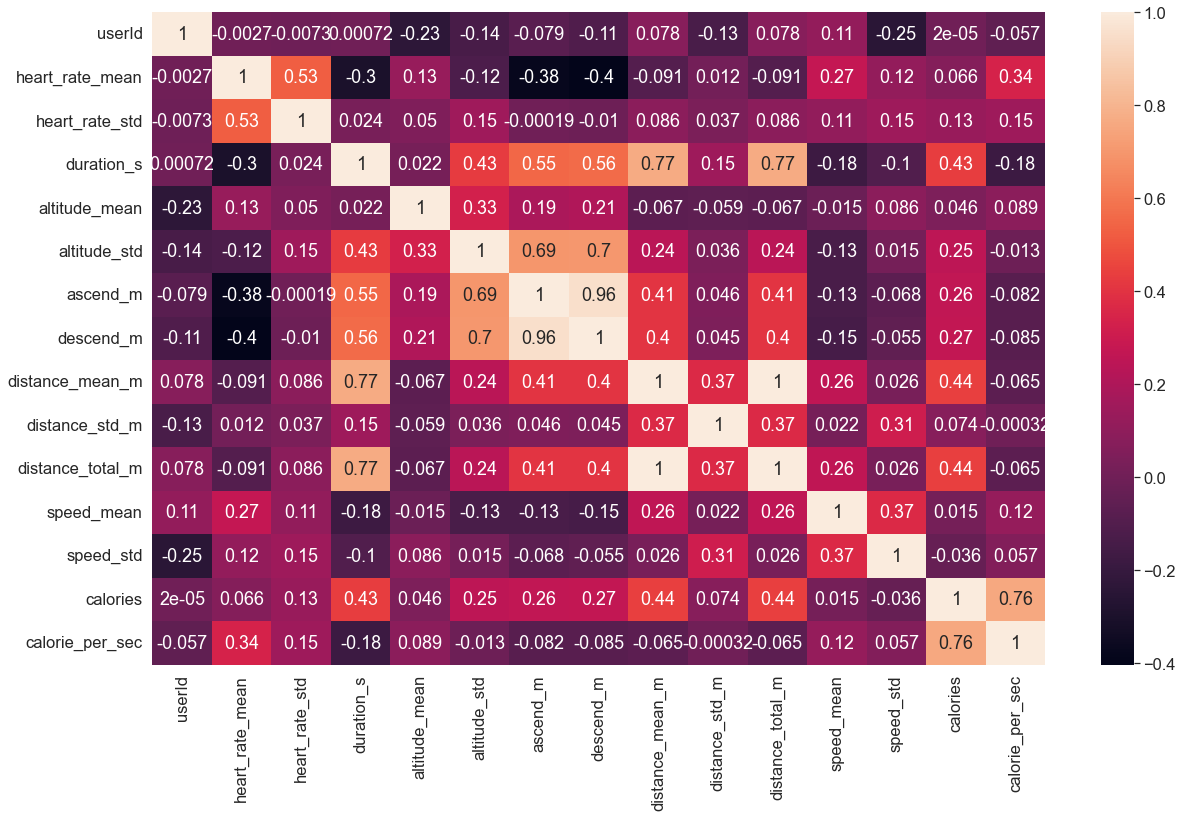

In [69]:
df_walk = df_light_selected_1[df_light_selected_1['sport']=='walk']
corr = df_walk.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

**From the correlation map of all walking, distance_total_m highly correlates with duration_s.**

**The potential target calories is not highly correlated with any features but calories.**

## Analysis of long term hear rate change for a specific user

In [75]:
df_selected_user = df_light[df_light['userId'] == 69]

In [76]:
df_selected_user

,id,userId,gender,sport,heart_rate_mean,heart_rate_std,duration_s,start_end,altitude_mean,altitude_std,...,distance_total_m,speed_mean,speed_std,hydration,ascent,descent,calories,distance,weather,start_time
167705,649676370,69,male,run,140.448,11.588930,4149.0,"[1451412063.0, 1451416212.0]",-69.332000,11.228115,...,11096.331297,2.779219,0.648816,NaN,52.6,118.6,654.000,11.147260,7.0,2015-12-29T10:01:03.000Z
167706,647765558,69,male,run,131.142,14.834616,2821.0,"[1451055213.0, 1451058034.0]",-30.666800,9.009076,...,6397.189608,2.716303,0.783244,NaN,32.4,62.2,364.000,6.579070,40.0,2015-12-25T06:53:33.000Z
167707,647573783,69,male,bike,123.318,19.320892,3132.0,"[1450984638.0, 1450987770.0]",-43.502400,2.803811,...,11532.577927,11.236294,173.098632,NaN,0.0,0.0,633.369,9.231130,7.0,2015-12-24T11:17:18.000Z
167708,646564727,69,male,run,123.616,16.942271,3884.0,"[1450722653.0, 1450726537.0]",-12.446400,7.749751,...,8692.985966,2.287616,0.836970,NaN,41.2,50.8,509.000,8.478950,4.0,2015-12-21T10:30:53.000Z
167709,645847381,69,male,run,135.868,10.301193,16713.0,"[1450539045.0, 1450555758.0]",-13.842000,9.301247,...,41052.830169,2.528149,0.468451,NaN,142.6,154.4,2658.000,42.236240,38.0,2015-12-19T07:30:45.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167778,30369221,69,male,run,169.894,12.732587,700.0,"[1323017480.0, 1323018180.0]",14.599420,5.357932,...,2793.405650,3.985560,0.499092,NaN,10.0,10.0,280.000,2.790000,NaN,2011-12-04T08:51:20.000Z
167779,596955589,69,male,bike,108.846,22.735221,3389.0,"[1320184906.0, 1320188295.0]",13.930400,2.401365,...,2908.260612,1.581994,1.098630,NaN,0.0,0.0,205.000,1.668679,NaN,2011-11-01T15:01:46.000Z
167780,24888434,69,male,run,160.842,9.856421,720.0,"[1317828485.0, 1317829205.0]",49.900939,5.624594,...,2797.032946,3.887304,0.527690,NaN,10.0,20.0,292.000,2.790000,NaN,2011-10-05T08:28:05.000Z
167781,538385734,69,male,bike,113.518,14.371001,4105.0,"[1314372379.0, 1314376484.0]",14.380400,2.868291,...,7079.074606,5.212732,5.161255,NaN,0.0,0.0,NaN,7.126500,NaN,2011-08-26T08:26:19.000Z


In [89]:
pd.set_option('display.max_rows', 100)

In [90]:
df_selected_user_2 = df_selected_user[['id', 'heart_rate_mean','speed_mean','start_time', 'sport']]

In [91]:
df_selected_user_2

,id,heart_rate_mean,speed_mean,start_time,sport
167705,649676370,140.448,2.779219,2015-12-29T10:01:03.000Z,run
167706,647765558,131.142,2.716303,2015-12-25T06:53:33.000Z,run
167707,647573783,123.318,11.236294,2015-12-24T11:17:18.000Z,bike
167708,646564727,123.616,2.287616,2015-12-21T10:30:53.000Z,run
167709,645847381,135.868,2.528149,2015-12-19T07:30:45.000Z,run
167710,645303803,134.014,2.645762,2015-12-17T12:51:24.000Z,run
167711,643843737,138.936,2.695285,2015-12-13T13:23:10.000Z,run
167712,641366714,127.106,2.683850,2015-12-07T08:22:00.000Z,run
167713,640726399,135.180,2.580766,2015-12-05T13:54:10.000Z,run
167714,637653418,129.212,2.330850,2015-11-27T07:54:12.000Z,run


In [109]:
df_selected_user_2['date'] = df_selected_user_2['start_time'].str.extract('(\d{1,4}([.\-/])\d{1,2}([.\-/])\d{1,4})')[0]

<ipython-input-109-bde2cd17f0c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_user_2['date'] = df_selected_user_2['start_time'].str.extract('(\d{1,4}([.\-/])\d{1,2}([.\-/])\d{1,4})')[0]


In [92]:
df_selected_user_2_bike = df_selected_user_2[df_selected_user_2['sport']=='bike']
df_selected_user_2_run = df_selected_user_2[df_selected_user_2['sport']=='run']

In [93]:
df_selected_user_2_bike

,id,heart_rate_mean,speed_mean,start_time,sport
167707,647573783,123.318,11.236294,2015-12-24T11:17:18.000Z,bike
167720,629323869,119.594,4.895065,2015-10-31T12:43:04.000Z,bike
167721,623889361,124.024,8.621796,2015-10-26T09:47:46.000Z,bike
167722,623889559,141.258,8.404446,2015-10-25T15:03:02.000Z,bike
167723,623889746,132.488,8.936415,2015-10-25T13:30:57.000Z,bike
167724,623889948,126.140,7.762151,2015-10-25T12:19:39.000Z,bike
167725,623848655,133.470,8.551983,2015-10-23T18:39:50.000Z,bike
167726,623848839,138.680,8.839288,2015-10-22T12:03:45.000Z,bike
167727,642838575,138.662,8.826641,2015-10-22T10:22:59.000Z,bike
167728,623849135,142.394,8.815028,2015-10-20T11:40:58.000Z,bike


In [95]:
from datetime import datetime

In [97]:
import re

In [101]:
df_selected_user_2_bike['date'] = df_selected_user_2_bike['start_time'].str.extract('(\d{1,4}([.\-/])\d{1,2}([.\-/])\d{1,4})')[0]

<ipython-input-101-059031f5c5e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_user_2_bike['date'] = df_selected_user_2_bike['start_time'].str.extract('(\d{1,4}([.\-/])\d{1,2}([.\-/])\d{1,4})')[0]


In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='date', ylabel='heart_rate_mean'>

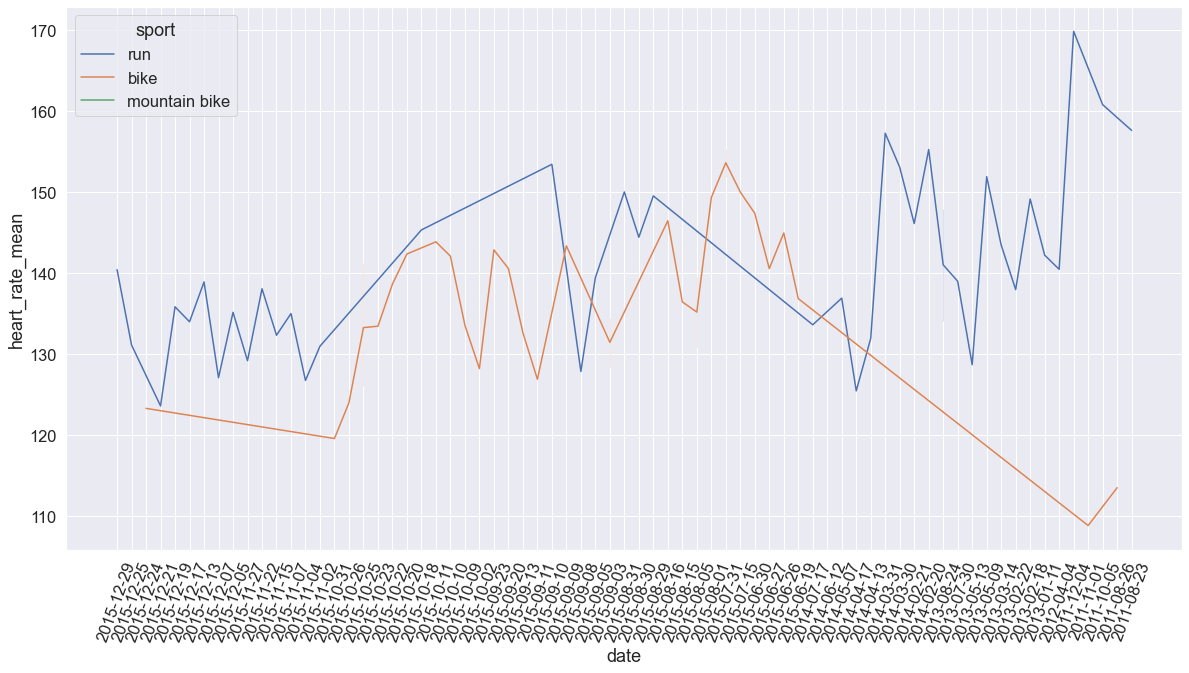

In [129]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks(rotation=70)
sns.lineplot(x="date", y="heart_rate_mean", hue="sport", data=df_selected_user_2)

**Since the speed are all within a certain range during the time span, the longer a user keep exercising, the lower the heart rate seems to be.**